# 🚀 En este NOTEBOOK vamos a calular la probabilidad de falla en las Juntas Toricas del lanzamiento del Challenger en 1986 👩🏻‍🚀


### - Antonio Guerrero

In [ ]:
# Librerias que vamos a usar para plotear

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import log

# Librerias para Regresion Logistica Binaria

from sklearn.linear_model import LogisticRegression

## La siguiente fue la DATA proporcionada por la NASA antes del último lanzamiento del Challenger

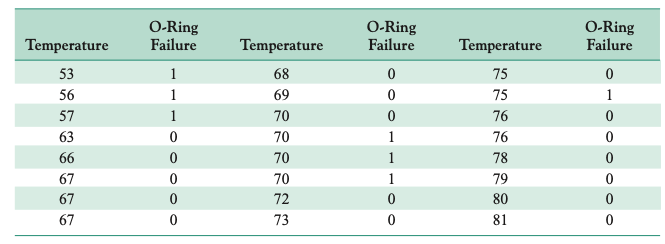

In [ ]:
# Pasamos esa DATA a un df

data = {
    'Temperature': [53, 56, 57, 63, 66, 67, 67, 67, 68, 69, 70, 70, 70, 70,
                    72, 73, 75, 75, 76, 76, 78, 79, 80, 81],
    'O-Ring Failure': [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
                       0, 0, 0, 0, 0, 0]
}

# Creamos el df
df = pd.DataFrame(data)

# Imprimir el DataFrame para verificar
print(df)

    Temperature  O-Ring Failure
0            53               1
1            56               1
2            57               1
3            63               0
4            66               0
5            67               0
6            67               0
7            67               0
8            68               0
9            69               0
10           70               0
11           70               1
12           70               1
13           70               1
14           72               0
15           73               0
16           75               0
17           75               1
18           76               0
19           76               0
20           78               0
21           79               0
22           80               0
23           81               0


/tmp/ipython-input-949178592.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


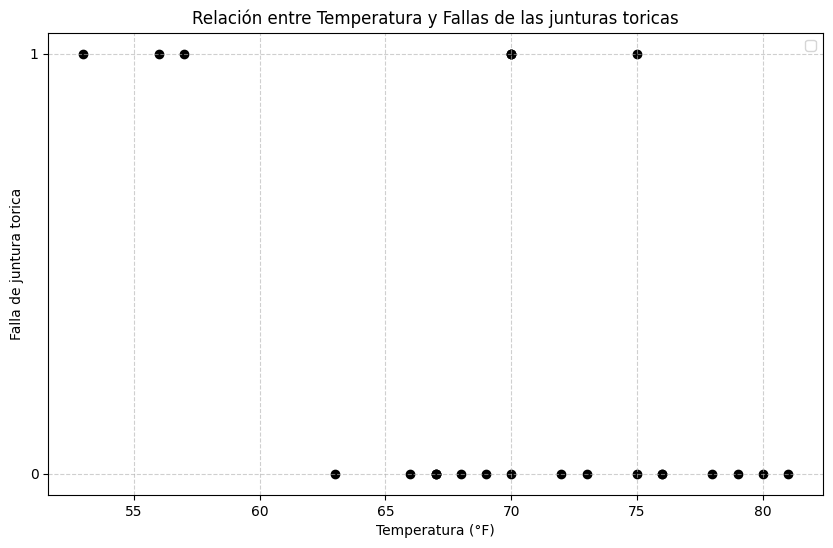

In [ ]:
# Vamos a plotear los datos

plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión (scatter plot)
plt.scatter(
    df['Temperature'],
    df['O-Ring Failure'],
    color='black',
)

# Añadir títulos
plt.title('Relación entre Temperatura y Fallas de las junturas toricas')
plt.xlabel('Temperatura (°F)')
plt.ylabel('Falla de juntura torica')
plt.yticks([0, 1]) # Asegura que el eje Y solo muestre 0 y 1
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Mostrar
plt.show()

In [ ]:
# Ahora hagamos la regresión logistica binaria sobre estos datos

X = df[['Temperature']]
y = df['O-Ring Failure']

# Crear una instancia del modelo de regresión logística
log_reg = LogisticRegression()

# Entrenar el modelo con los datos
log_reg.fit(X, y)

# Imprimir los coeficientes para interpretar el modelo
print(f"Intercepto del modelo: {log_reg.intercept_[0]:.4f}")
print(f"Coeficiente de Temperatura: {log_reg.coef_[0][0]:.4f}")

Intercepto del modelo: 10.7951
Coeficiente de Temperatura: -0.1701


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


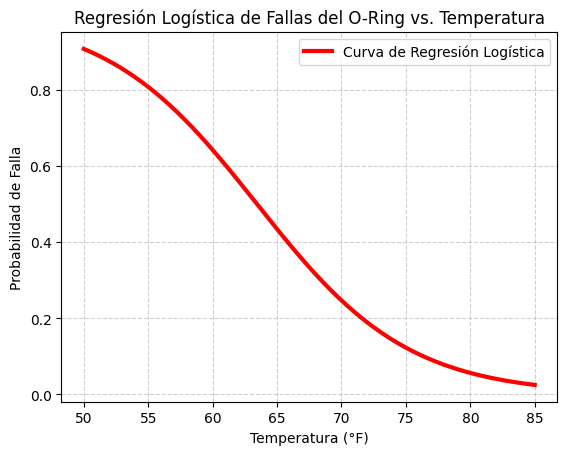

In [ ]:
# Imprimimos el modelo

# Crear un rango suave de temperaturas para dibujar una curva continua
X_test = np.linspace(50, 85, 300).reshape(-1, 1)

# Predecir la PROBABILIDAD de falla para cada punto en ese rango
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Dibujar la curva de regresión logística
plt.plot(X_test, y_prob, color='red', linewidth=3, label='Curva de Regresión Logística')

# Añadir los toques finales al gráfico
plt.title('Regresión Logística de Fallas del O-Ring vs. Temperatura')
plt.xlabel('Temperatura (°F)')
plt.ylabel('Probabilidad de Falla')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Mostrar el gráfico
plt.show()

## El challenger fue lanzado por última vez el 28 de Enero de 1986. Se sabia (y se ve en los datos) que lanzamientos a bajas temperaturas eran peligrosas para las fallas de las junturas toricas, aún asi decidió lanzarse en Cabo Cañaveral a un temperatura de 31F, veamos que predicción no da el modelo de falla en las juntas con esa temperatura

In [ ]:
# Predicción del falla según el modelo a 31 grados Farenheit

prob_falla = log_reg.predict_proba([[31]])[0][1]
print(f"Predicción de la probabilidad de falla según el modelo a 31 grados: {prob_falla:.4f}")

Predicción de la probabilidad de falla según el modelo a 31 grados: 0.9960


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### El resultado de dicho lanzamiento fue la hoy conocida catastrofe del Challenger, y una muestra de porque ingeniero y cientificos debemos tener un profundo entendiemiento en teoría de probabilidad y estadistica, pero también una muestra de la gran responsabilidad que se debe tener por la explicación y transmisión de los numeros y resultados que obtenemos.

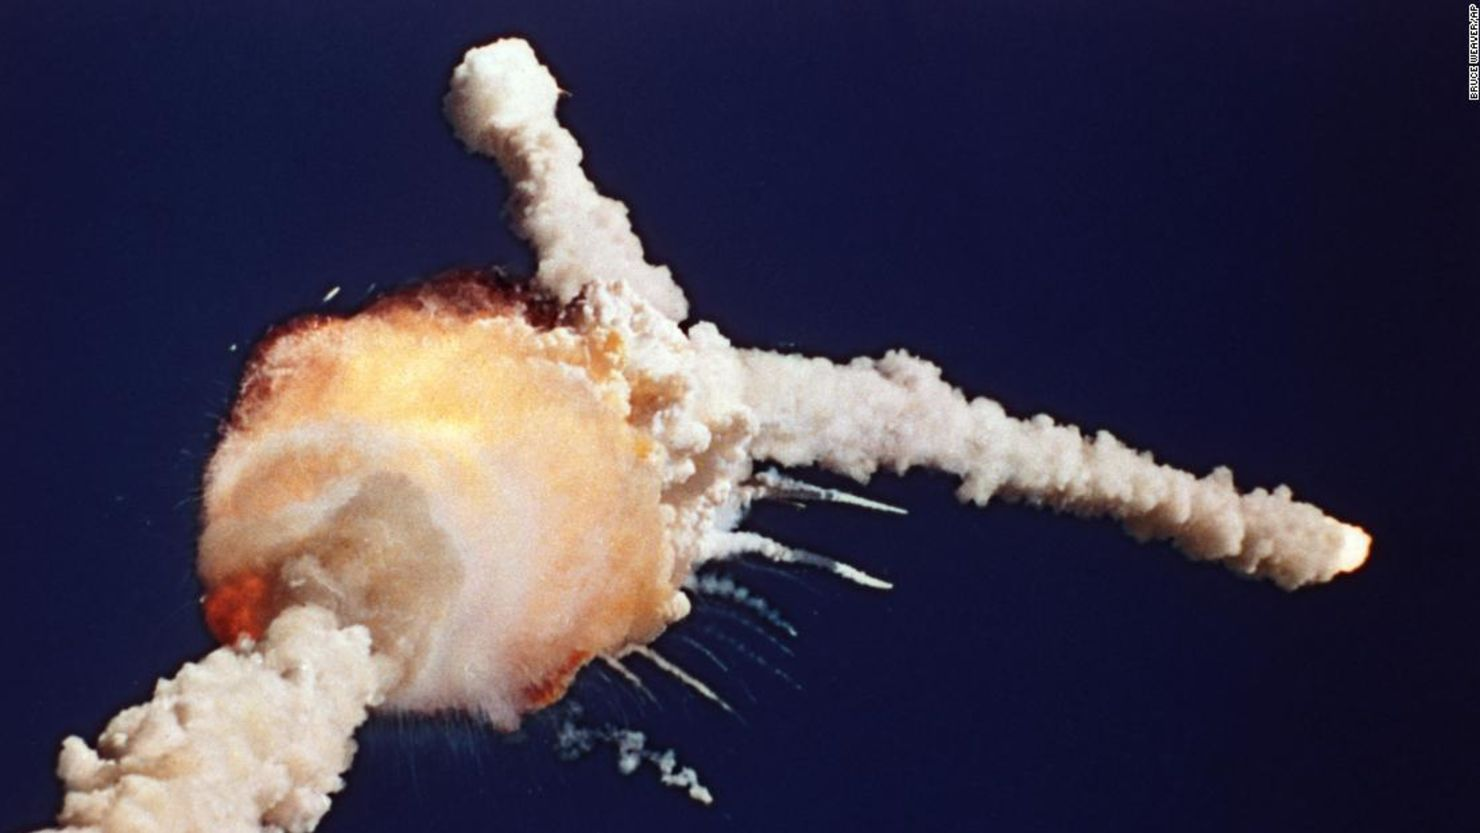